In [3]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from datetime import datetime
from math import ceil
import seaborn as sns
from dateutil.relativedelta import relativedelta
from sklearn.metrics import mean_squared_error
from datetime import timedelta

from math import sqrt
import holidays
import catboost

In [60]:
import catboost as ctb

In [86]:
df = pd.read_csv('sales_transformed_with_coords.csv')

In [87]:
df

,Unnamed: 0,Unnamed: 0.1,year,month,store_format,address,brand,sales,location,latitude,longitude
0,0,0,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Талка,2.7,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147
1,1,24,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Beluga,NaN,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147
2,2,48,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Зеленая Марка,5.3,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147
3,3,72,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Kremlin Award,NaN,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147
4,4,96,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Medoff,1.9,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147
...,...,...,...,...,...,...,...,...,...,...,...
3684163,3684163,3687791,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Царская,1.9,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.683060
3684164,3684164,3687815,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Чистые Росы,0.5,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.683060
3684165,3684165,3687839,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Organika,0.1,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.683060
3684166,3684166,3687863,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Spelta,NaN,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.683060


In [88]:
df = df.drop('Unnamed: 0', axis=1)

In [89]:
df.head()

,Unnamed: 0.1,year,month,store_format,address,brand,sales,location,latitude,longitude
0,0,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Талка,2.7,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147
1,24,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Beluga,NaN,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147
2,48,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Зеленая Марка,5.3,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147
3,72,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Kremlin Award,NaN,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147
4,96,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Medoff,1.9,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147


In [90]:
df.tail()

,Unnamed: 0.1,year,month,store_format,address,brand,sales,location,latitude,longitude
3684163,3687791,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Царская,1.9,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.68306
3684164,3687815,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Чистые Росы,0.5,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.68306
3684165,3687839,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Organika,0.1,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.68306
3684166,3687863,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Spelta,NaN,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.68306
3684167,3687887,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Vodka Other Brand,0.1,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.68306


In [91]:
len(df['store_format'].unique()), len(df['address'].unique()), len(df['brand'].unique())

(5, 2356, 277)

In [ ]:
# profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}}, minimal=True)
# profile.to_notebook_iframe()

<hr>
<hr>
<hr>


### Plotting per shop sales


In [93]:
# add col with a date
df['date'] = df.apply(lambda x: datetime(int(x['year']), int(x['month']), 1), axis=1)

grouped_by_address = pd.DataFrame(df.groupby(['address', 'date'])['sales'].sum().reset_index())

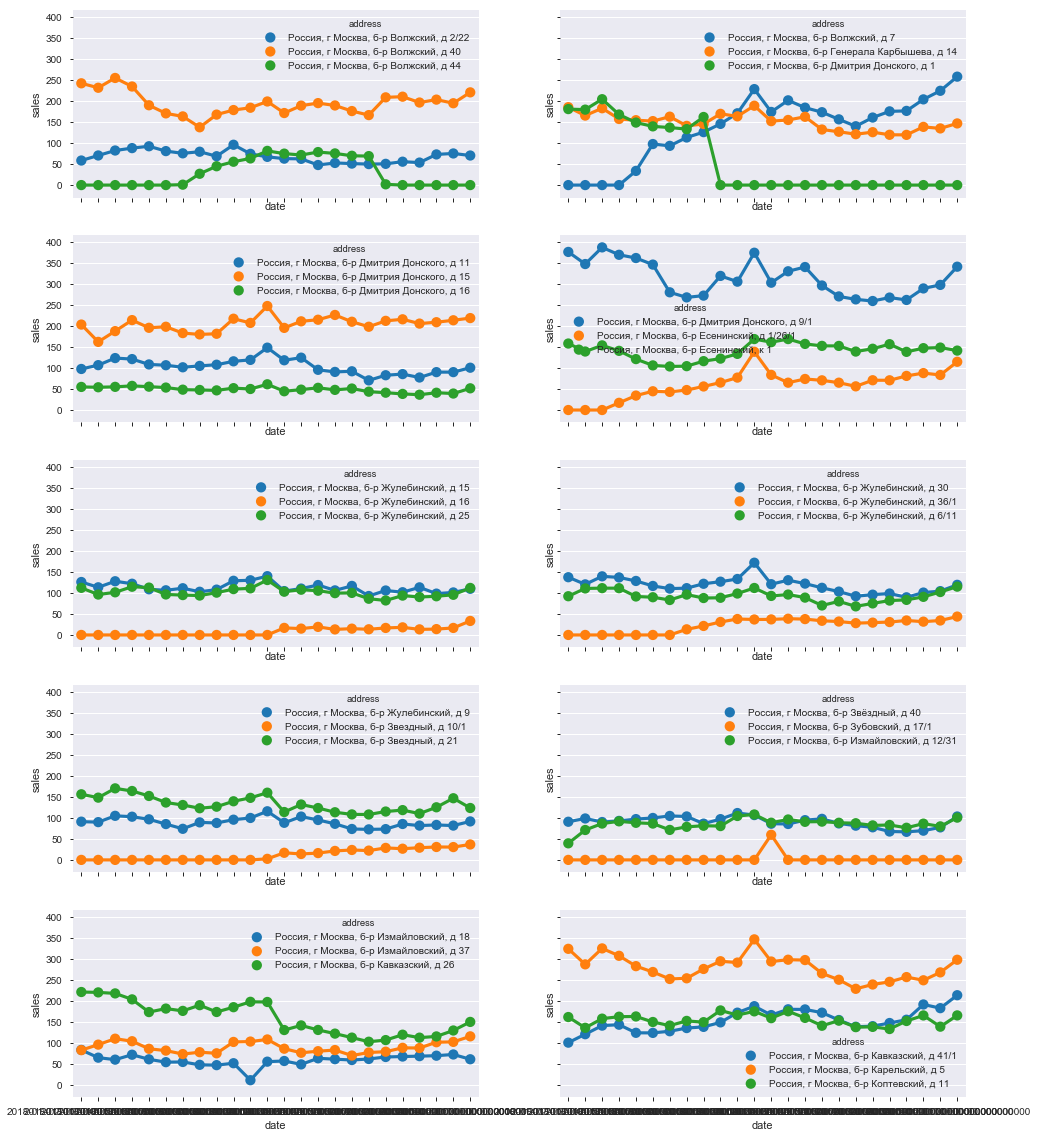

In [142]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = 72
count = 10
for i in range(5):
    for j in range(2):
        sns.pointplot(
            x='date', 
            y='sales', 
            hue='address', 
            data=grouped_by_address.loc[(grouped_by_address.index >= count*id_per_graph) & (grouped_by_address.index < (count+1)*id_per_graph)],
            ax=axes[i][j],
        )
        count += 1

### Plotting per item sales

In [95]:
grouped_by_brand = pd.DataFrame(df.groupby(['brand', 'date'])['sales'].sum().reset_index())

In [96]:
grouped_by_brand.tail()

,brand,date,sales
6643,Ямская,2019-08-01,0.0
6644,Ямская,2019-09-01,0.0
6645,Ямская,2019-10-01,0.0
6646,Ямская,2019-11-01,0.0
6647,Ямская,2019-12-01,0.1


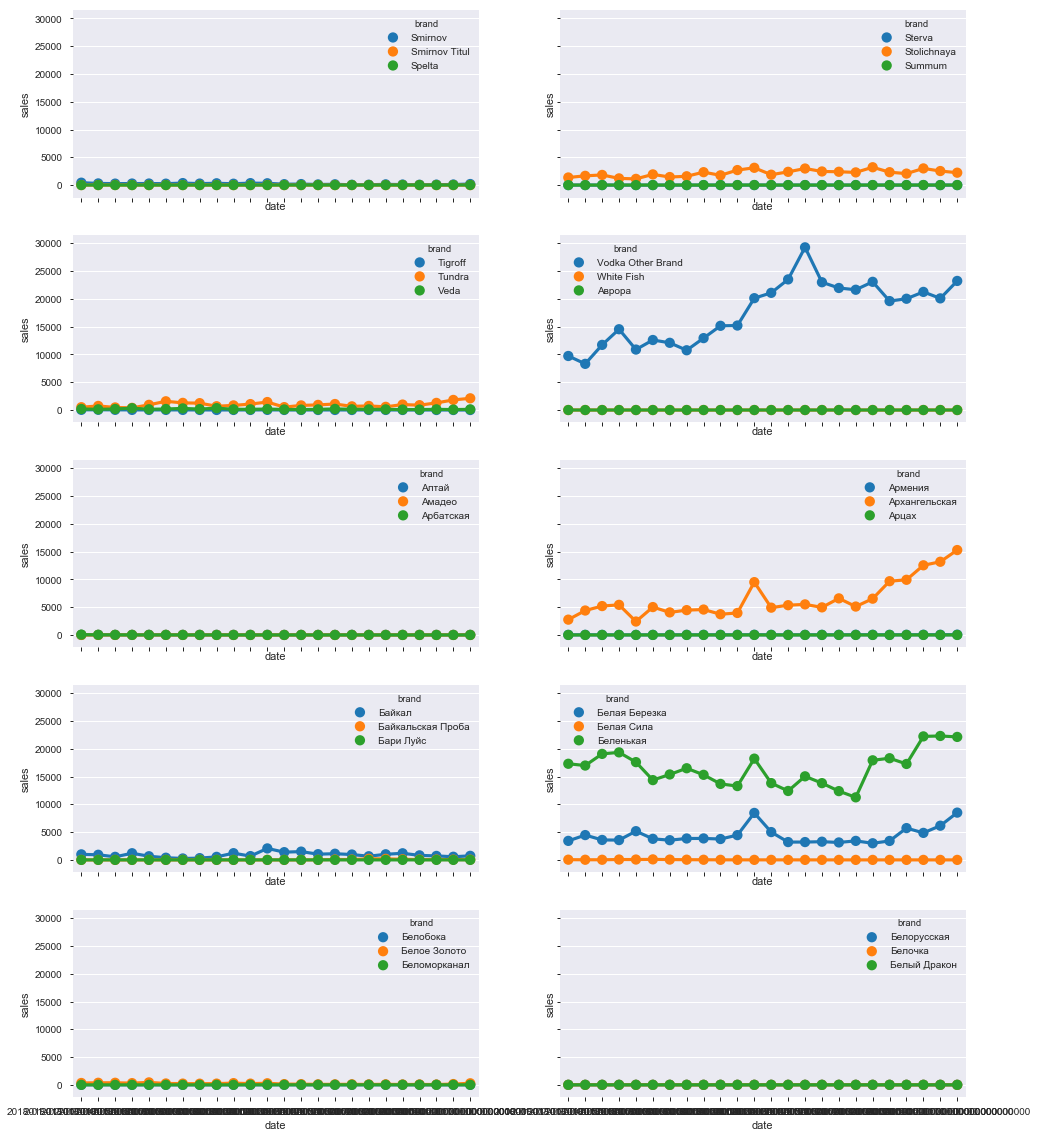

In [143]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = 72
count = 10
for i in range(5):
    for j in range(2):
        sns.pointplot(
            x='date', 
            y='sales', 
            hue='brand', 
            data=grouped_by_brand.loc[(grouped_by_brand.index >= count*id_per_graph) & (grouped_by_brand.index < (count+1)*id_per_graph)],
            ax=axes[i][j],
        )
        count += 1

### Сhecking outliers

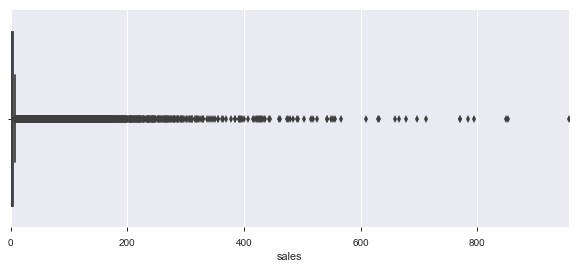

In [98]:
plt.figure(figsize=(10,4))
plt.xlim(df['sales'].min(), df['sales'].max())
sns.boxplot(x=df['sales'])

## Data preparation

In [99]:
# check fully empty uninformative rows by address
df_address_sum = df.groupby(['address'])['sales'].sum().reset_index()
# df_address_sum[df_address_sum['sales'] <= 0]
df_address_sum.sort_values(by=['sales'])

,address,sales
1798,"Россия, г Москва, ул Свободы, д 91/1",0.2
2293,"Россия, г Москва, ш Перовское, д 10/1",0.4
1765,"Россия, г Москва, ул Руставели, д 6/6",1.6
602,"Россия, г Москва, ул Авиамоторная, д 6/4",3.4
2011,"Россия, г Москва, ул Фестивальная, д 27",9.3
...,...,...
1766,"Россия, г Москва, ул Рябиновая, д 59",28081.5
350,"Россия, г Москва, пр-кт Мира, д 211/1",32749.1
986,"Россия, г Москва, ул Дорожная, д 1/1",34177.1
150,"Россия, г Москва, км МКАД 104-й, д 6",35484.2


In [100]:
# delete fully empty uninformative rows by brand
df_brand_sum = df.groupby(['brand'])['sales'].sum().reset_index()
useless_brands = df_brand_sum[df_brand_sum['sales'] <= 0]['brand'].tolist()
len(useless_brands)
# todo: check how to do it
# df = df.drop(df['brand'].isin(useless_brands).index)

1

In [101]:
# drop Nan columns
df = df.dropna(subset=['sales'])

In [102]:
# adding a columnt with count of days in each month
days = pd.Series([0, 31,28,31,30,31,30,31,31,30,31,30,31])
df['days'] = df['month'].map(days).astype(np.int64)

In [103]:
df['days'] = df['days'].astype(np.int64)

In [104]:
df['days'].unique()

array([31, 28, 30])

In [105]:
month_revenues = df.groupby(['address', 'date']).agg({'sales': ['sum', 'mean']})
month_revenues.columns = ['sales_sum', 'sales_mean']
month_revenues

sales_sum  \
address                                            date                    
Россия, г Москва, Внуковское п, б-р Андрея Тарк... 2019-10-01       60.8   
                                                   2019-11-01       93.3   
                                                   2019-12-01       96.8   
Россия, г Москва, Внуковское п, ул Анны Ахматов... 2018-01-01      141.3   
                                                   2018-02-01      139.7   
...                                                                  ...   
Россия, г Москва, ш Ярославское, д 69              2019-08-01      177.4   
                                                   2019-09-01      187.1   
                                                   2019-10-01      192.5   
                                                   2019-11-01      248.4   
                                                   2019-12-01      277.4   

                                                               sales_mean  
address                                            date                    
Россия, г Москва, Внуковское п, б-р Андрея Тарк... 2019-10-01    1.240816  
                                                   2019-11-01    1.794231  
                                                   2019-12-01    1.792593  
Россия, г Москва, Внуковское п, ул Анны Ахматов... 2018-01-01    3.286047  
                                                   2018-02-01    3.326190  
...                                                                   ...  
Россия, г Москва, ш Ярославское, д 69              2019-08-01    3.411538  
                                                   2019-09-01    3.530189  
                                                   2019-10-01    3.632075  
                                                   2019-11-01    4.686792  
                                                   2019-12-01    5.233962  

[46408 rows x 2 columns]

In [106]:
month_revenues.loc['Россия, г Москва, Внуковское п, б-р Андрея Тарковского, д 1', '2019-10-01']

sales_sum     60.800000
sales_mean     1.240816
Name: (Россия, г Москва, Внуковское п, б-р Андрея Тарковского, д 1, 2019-10-01 00:00:00), dtype: float64

In [107]:
def get_prev_month_revenue(row):
    prev_date = pd.to_datetime(row['date']) - relativedelta(months=1)
    prev_date = prev_date.replace(day=1)
    try:
        prev_val = month_revenues.loc[row['address'], prev_date]['sales_sum']
    except KeyError:
        return -1
    return prev_val or -1

In [108]:
df['prev_month_revenue'] = df.apply(get_prev_month_revenue, axis=1)

In [109]:
df

,Unnamed: 0.1,year,month,store_format,address,brand,sales,location,latitude,longitude,date,days,prev_month_revenue
0,0,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Талка,2.7,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147,2018-01-01,31,-1.0
2,48,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Зеленая Марка,5.3,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147,2018-01-01,31,-1.0
4,96,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Medoff,1.9,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147,2018-01-01,31,-1.0
6,144,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Stolichnaya,0.7,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147,2018-01-01,31,-1.0
8,192,2018,1,Discounter,"Россия, г Москва, аллея Беговая, д 3",Архангельская,0.6,"Беговая аллея, 3, Москва, Россия",55.782856,37.565147,2018-01-01,31,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684161,3687743,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Старая Москва,0.1,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.683060,2019-12-01,31,8.6
3684163,3687791,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Царская,1.9,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.683060,2019-12-01,31,8.6
3684164,3687815,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Чистые Росы,0.5,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.683060,2019-12-01,31,8.6
3684165,3687839,2019,12,Supermarket,"Россия, г Москва, ш Ярославское, д 12",Organika,0.1,"Ярославское шоссе, 12к2, Москва, Россия",55.854517,37.683060,2019-12-01,31,8.6


In [ ]:
# # categorical features encoding
# # todo: try mean target encoding
# address_dummies = pd.get_dummies(df['address'], prefix='address')
# address_dummies.shape

In [ ]:
# # categorical features encoding
# brand_dummies = pd.get_dummies(df['brand'], prefix='brand')
# brand_dummies.shape

In [ ]:
# store_format_dummies = pd.get_dummies(df['store_format'], prefix='store_format')
# store_format_dummies.shape

In [110]:
# concatenate with one-hot features matrices and delete original columns
# df = pd.concat([df, brand_dummies, store_format_dummies, address_dummies], axis=1)
df = df.drop(['location'], axis=1)

In [111]:
ru_holidays = holidays.Russia()

In [112]:
def get_holidays_count(month_start):
    month_start = pd.to_datetime(month_start)
    month_end = month_start + relativedelta(months=1)
    return len(ru_holidays[month_start:month_end])

In [113]:
df['holidays_cnt'] = df['date'].apply(get_holidays_count).astype(np.int64)

## TODO: Rolling Features

In [ ]:
# df_aggregated = df.groupby(['address', 'brand', 'date'])['sales'].sum().reset_index()
# df_aggregated['rolling_mean'] = -1
# df_aggregated['rolling_median'] = -1
# df_aggregated['rolling_sum'] = -1
# df_aggregated['rolling_max'] = -1
# df_aggregated['rolling_min'] = -1

In [ ]:
# # rolling inside each store, brand
# addresses = df_aggregated['address'].unique()
# for brand in df_aggregated['brand'].unique():
#   for address in addresses:
#     grouped_for_address = df_aggregated[
#                                         (df_aggregated['brand'] == brand) & 
#                                         (df_aggregated['address'] == address)
#                                         ]
#     grouped_for_address['rolling_mean'] = grouped_for_address['sales'].rolling(window=3).mean()
#     grouped_for_address['rolling_median'] = grouped_for_address['sales'].rolling(window=3).media()
#     grouped_for_address['rolling_sum'] = grouped_for_address['sales'].rolling(window=3).sum()
#     grouped_for_address['rolling_max'] = grouped_for_address['sales'].rolling(window=3).max()
#     grouped_for_address['rolling_min'] = grouped_for_address['sales'].rolling(window=3).min()

In [114]:
df = df.drop('Unnamed: 0.1', axis=1)

## Train/Validation/Test split

I will use last month for test set

In [115]:
train_set = df[df['date'] < '2019-12-01']
test_set = df[df['date'] >= '2019-12-01']

In [116]:
# sanity check
len(test_set) + len(train_set) == len(df)

True

In [117]:
def train_val_split(df, start_date):
    start_date = pd.to_datetime(start_date)
    return df.loc[
        (df['date'] >= start_date) & (df['date'] < start_date + relativedelta(months=3))
    ].index,\
    df.loc[
        (df['date'] >= start_date + relativedelta(months=3)) & (df['date'] < start_date + relativedelta(months=6))
    ].index

In [118]:
quartal_dates = ['2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
                '2019-01-01', '2019-04-01', '2019-07-01']

In [119]:
cv_iterator = []
for d in quartal_dates:
    train_idx, val_idx = train_val_split(train_set, d)
    cv_iterator.append((train_idx, val_idx))

In [120]:
for tr, vl in cv_iterator:
    print(min(tr), min(vl))

0 460521
460521 921042
921042 1381563
1381563 1842084
1842084 2302605
2302605 2763126
2763126 3223647


In [121]:
X = train_set.drop(['sales', 'date'], axis=1)
# X = train_set.drop(['sales'], axis=1)
y = train_set['sales']

X_test = test_set.drop(['sales', 'date'], axis=1)
# X_test = test_set.drop(['sales'], axis=1)
y_test = test_set['sales']

In [122]:
# sanity check
len(X_test) + len(X) == len(df), len(y) + len(y_test) == len(df)

(True, True)

### Baseline models

In [39]:
def get_rmse(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual, y_predicted))

1. Constant

In [ ]:
CONS = 1
rmses = []
for _, val_idx in cv_iterator:
    y_actual = y.loc[val_idx]
    y_predicted = [CONS] * len(y_actual)
    rmses.append(get_rmse(y_actual, y_predicted))
np.mean(rmses)

2. Prediction by last period

In [123]:
def get_prev_sales(row):
        prev_date = pd.to_datetime(row['date']) - relativedelta(months=1)
        prev_date = prev_date.replace(day=1)
        last_y = train_set[
            (train_set['month'] == prev_date) & 
            (train_set['brand'] == row['brand'])
        ]['sales']
        if last_y.any():
            last_y = last_y.iloc[0]['sales']
        else:
            last_y = 0
        return last_y

In [124]:
rmses = []
for _, val_idx in cv_iterator:
    y_actual = y.loc[val_idx]
    y_predicted = train_set.loc[val_idx].apply(get_prev_sales, axis=1)
    rmses.append(get_rmse(y_actual, y_predicted))

[6.54953433459204]
[6.54953433459204, 5.164803965302071]
[6.54953433459204, 5.164803965302071, 5.580206089384156]
[6.54953433459204, 5.164803965302071, 5.580206089384156, 4.599141224185228]
[6.54953433459204, 5.164803965302071, 5.580206089384156, 4.599141224185228, 5.074396515843041]
[6.54953433459204, 5.164803965302071, 5.580206089384156, 4.599141224185228, 5.074396515843041, 4.798489345617014]
[6.54953433459204, 5.164803965302071, 5.580206089384156, 4.599141224185228, 5.074396515843041, 4.798489345617014, 3.537301231164798]


In [126]:
np.mean(rmses)

5.04341038658405

3. Mean for last 5 periods

In [134]:
def get_prev_5_sales(row):
        y_previous = []
        for i in range(1, 6):
            prev_date = pd.to_datetime(row['date']) - relativedelta(months=i)
            prev_date = prev_date.replace(day=1)
            prev_y = train_set[
                (train_set['month'] == prev_date) & 
                (train_set['brand'] == row['brand'])
            ]['sales']
            if prev_y.any():
                prev_y = prev_y.iloc[0]['sales']
            else:
                prev_y = 0
            y_previous.append(prev_y)
        return np.mean(y_previous or [0])

In [135]:
rmses = []
for _, val_idx in cv_iterator:
    y_actual = y.loc[val_idx]
    y_predicted = train_set.loc[val_idx].apply(get_prev_5_sales, axis=1)
    rmses.append(get_rmse(y_actual, y_predicted))
    print(rmses)


[6.54953433459204]
[6.54953433459204, 5.164803965302071]
[6.54953433459204, 5.164803965302071, 5.580206089384156]
[6.54953433459204, 5.164803965302071, 5.580206089384156, 4.599141224185228]
[6.54953433459204, 5.164803965302071, 5.580206089384156, 4.599141224185228, 5.074396515843041]
[6.54953433459204, 5.164803965302071, 5.580206089384156, 4.599141224185228, 5.074396515843041, 4.798489345617014]
[6.54953433459204, 5.164803965302071, 5.580206089384156, 4.599141224185228, 5.074396515843041, 4.798489345617014, 3.537301231164798]


5.04341038658405

In [133]:
np.mean(rmses)

5.04341038658405

4. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

rmses = []
for train_idx, val_idx in cv_iterator:
    lin_reg = LinearRegression()
    lin_reg.fit(X.loc[train_idx], y.loc[train_idx])
    y_val_predicted = lin_reg.predict(train_set.loc[val_idx])
    rmse = get_rmse(y.loc[val_idx], y_val_predicted)
    print('rmse', rmse)
    rmses.append(rmse)

In [ ]:
np.mean(rmses)

## Catboost

In [56]:
len(X.columns)
categorical_features_indices = np.where((X.dtypes != np.float) & (X.dtypes != np.int))[0]

In [57]:
X.dtypes

year                    int64
month                   int64
store_format           object
address                object
brand                  object
latitude              float64
longitude             float64
days                    int64
prev_month_revenue    float64
holidays_cnt            int64
dtype: object

In [58]:
categorical_features_indices

array([2, 3, 4])

In [61]:
params = {
    "loss_function": "RMSE",
    "eval_metric": "RMSE",
    "iterations": 1000,
    "random_seed": 42,
    "od_wait": 50,
    "od_type": "Iter",
    "thread_count": 10
}

grid = {
    'learning_rate': [0.01, 0.03, 0.06],
    'depth': [4, 6, 10],
}

ctb_data = ctb.Pool(X, y, cat_features=categorical_features_indices)

model = ctb.CatBoostRegressor(**params)

In [62]:
grid_search_result = model.grid_search(grid, ctb_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 4.4342418	best: 4.4342418 (0)	total: 8m 46s	remaining: 1h 10m 13s
1:	loss: 4.0552168	best: 4.0552168 (1)	total: 17m 31s	remaining: 1h 1m 18s
2:	loss: 3.9161808	best: 3.9161808 (2)	total: 25m 51s	remaining: 51m 42s
3:	loss: 4.0218565	best: 3.9161808 (2)	total: 36m 56s	remaining: 46m 10s
4:	loss: 3.6990419	best: 3.6990419 (4)	total: 49m 38s	remaining: 39m 43s
5:	loss: 3.5978939	best: 3.5978939 (5)	total: 1h 5m 33s	remaining: 32m 46s
6:	loss: 3.6222556	best: 3.5978939 (5)	total: 1h 33m 14s	remaining: 26m 38s
7:	loss: 3.3677756	best: 3.3677756 (7)	total: 2h 52s	remaining: 15m 6s
8:	loss: 3.2312502	best: 3.2312502 (8)	total: 2h 29m 26s	remaining: 0us
Estimating final quality...


KeyboardInterrupt: 

In [64]:
# best_params = grid_search_result['params']
best_params = dict(learning_rate=0.06, depth=10)
params.update(best_params)

model = ctb.CatBoostRegressor(**params)
model.fit(ctb_data)

0:	learn: 6.8612975	total: 1.99s	remaining: 33m 5s
1:	learn: 6.6555865	total: 3.7s	remaining: 30m 47s
2:	learn: 6.4619855	total: 5.8s	remaining: 32m 6s
3:	learn: 6.2840476	total: 7.79s	remaining: 32m 18s
4:	learn: 6.1256681	total: 9.54s	remaining: 31m 38s
5:	learn: 5.9734656	total: 11.3s	remaining: 31m 3s
6:	learn: 5.8378606	total: 13s	remaining: 30m 39s
7:	learn: 5.7141912	total: 14.8s	remaining: 30m 36s
8:	learn: 5.5955752	total: 17.1s	remaining: 31m 18s
9:	learn: 5.4912377	total: 18.9s	remaining: 31m 11s
10:	learn: 5.4010096	total: 20.5s	remaining: 30m 41s
11:	learn: 5.3131030	total: 22.2s	remaining: 30m 25s
12:	learn: 5.2308735	total: 24.2s	remaining: 30m 35s
13:	learn: 5.1634795	total: 26.6s	remaining: 31m 11s
14:	learn: 5.0879961	total: 28.5s	remaining: 31m 10s
15:	learn: 5.0209118	total: 30.4s	remaining: 31m 6s
16:	learn: 4.9628196	total: 32.3s	remaining: 31m 5s
17:	learn: 4.9094400	total: 34.5s	remaining: 31m 24s
18:	learn: 4.8554410	total: 36.6s	remaining: 31m 27s
19:	learn: 4

153:	learn: 3.6455424	total: 5m 8s	remaining: 28m 16s
154:	learn: 3.6412018	total: 5m 10s	remaining: 28m 12s
155:	learn: 3.6369961	total: 5m 12s	remaining: 28m 8s
156:	learn: 3.6337568	total: 5m 13s	remaining: 28m 4s
157:	learn: 3.6320513	total: 5m 15s	remaining: 28m 1s
158:	learn: 3.6270551	total: 5m 17s	remaining: 27m 58s
159:	learn: 3.6233578	total: 5m 19s	remaining: 27m 59s
160:	learn: 3.6198217	total: 5m 21s	remaining: 27m 57s
161:	learn: 3.6173928	total: 5m 24s	remaining: 28m
162:	learn: 3.6134624	total: 5m 26s	remaining: 27m 57s
163:	learn: 3.6111354	total: 5m 28s	remaining: 27m 54s
164:	learn: 3.6082673	total: 5m 30s	remaining: 27m 53s
165:	learn: 3.6067780	total: 5m 32s	remaining: 27m 51s
166:	learn: 3.6066202	total: 5m 34s	remaining: 27m 48s
167:	learn: 3.6036167	total: 5m 36s	remaining: 27m 45s
168:	learn: 3.6014655	total: 5m 38s	remaining: 27m 44s
169:	learn: 3.5976615	total: 5m 40s	remaining: 27m 43s
170:	learn: 3.5976369	total: 5m 42s	remaining: 27m 38s
171:	learn: 3.5948

304:	learn: 3.3625805	total: 10m 6s	remaining: 23m 2s
305:	learn: 3.3614667	total: 10m 9s	remaining: 23m 1s
306:	learn: 3.3600677	total: 10m 11s	remaining: 22m 59s
307:	learn: 3.3589138	total: 10m 13s	remaining: 22m 58s
308:	learn: 3.3569898	total: 10m 15s	remaining: 22m 57s
309:	learn: 3.3558905	total: 10m 18s	remaining: 22m 55s
310:	learn: 3.3540482	total: 10m 19s	remaining: 22m 53s
311:	learn: 3.3522177	total: 10m 21s	remaining: 22m 51s
312:	learn: 3.3518482	total: 10m 24s	remaining: 22m 49s
313:	learn: 3.3499382	total: 10m 26s	remaining: 22m 47s
314:	learn: 3.3488358	total: 10m 28s	remaining: 22m 45s
315:	learn: 3.3466173	total: 10m 30s	remaining: 22m 44s
316:	learn: 3.3459529	total: 10m 33s	remaining: 22m 43s
317:	learn: 3.3456289	total: 10m 34s	remaining: 22m 41s
318:	learn: 3.3443428	total: 10m 37s	remaining: 22m 40s
319:	learn: 3.3427387	total: 10m 39s	remaining: 22m 38s
320:	learn: 3.3419722	total: 10m 41s	remaining: 22m 36s
321:	learn: 3.3404197	total: 10m 42s	remaining: 22m 

452:	learn: 3.1944253	total: 15m 7s	remaining: 18m 16s
453:	learn: 3.1934248	total: 15m 10s	remaining: 18m 14s
454:	learn: 3.1929070	total: 15m 12s	remaining: 18m 12s
455:	learn: 3.1911890	total: 15m 14s	remaining: 18m 10s
456:	learn: 3.1886024	total: 15m 16s	remaining: 18m 9s
457:	learn: 3.1882836	total: 15m 18s	remaining: 18m 7s
458:	learn: 3.1876366	total: 15m 20s	remaining: 18m 4s
459:	learn: 3.1871098	total: 15m 21s	remaining: 18m 2s
460:	learn: 3.1857705	total: 15m 23s	remaining: 17m 59s
461:	learn: 3.1845600	total: 15m 25s	remaining: 17m 58s
462:	learn: 3.1841553	total: 15m 28s	remaining: 17m 56s
463:	learn: 3.1814787	total: 15m 29s	remaining: 17m 54s
464:	learn: 3.1789151	total: 15m 31s	remaining: 17m 51s
465:	learn: 3.1783310	total: 15m 34s	remaining: 17m 50s
466:	learn: 3.1782662	total: 15m 36s	remaining: 17m 48s
467:	learn: 3.1774831	total: 15m 38s	remaining: 17m 47s
468:	learn: 3.1767344	total: 15m 41s	remaining: 17m 45s
469:	learn: 3.1760304	total: 15m 42s	remaining: 17m 4

600:	learn: 3.0660423	total: 20m 21s	remaining: 13m 31s
601:	learn: 3.0656788	total: 20m 24s	remaining: 13m 29s
602:	learn: 3.0646975	total: 20m 25s	remaining: 13m 27s
603:	learn: 3.0634679	total: 20m 27s	remaining: 13m 24s
604:	learn: 3.0626218	total: 20m 29s	remaining: 13m 22s
605:	learn: 3.0615125	total: 20m 31s	remaining: 13m 20s
606:	learn: 3.0601976	total: 20m 34s	remaining: 13m 18s
607:	learn: 3.0592836	total: 20m 35s	remaining: 13m 16s
608:	learn: 3.0588446	total: 20m 37s	remaining: 13m 14s
609:	learn: 3.0585186	total: 20m 39s	remaining: 13m 12s
610:	learn: 3.0581830	total: 20m 41s	remaining: 13m 10s
611:	learn: 3.0571653	total: 20m 43s	remaining: 13m 8s
612:	learn: 3.0566453	total: 20m 46s	remaining: 13m 6s
613:	learn: 3.0560172	total: 20m 48s	remaining: 13m 5s
614:	learn: 3.0553474	total: 20m 51s	remaining: 13m 3s
615:	learn: 3.0540798	total: 20m 54s	remaining: 13m 1s
616:	learn: 3.0528381	total: 20m 57s	remaining: 13m
617:	learn: 3.0520384	total: 20m 59s	remaining: 12m 58s
6

749:	learn: 2.9605597	total: 25m 32s	remaining: 8m 30s
750:	learn: 2.9601274	total: 25m 34s	remaining: 8m 28s
751:	learn: 2.9585291	total: 25m 36s	remaining: 8m 26s
752:	learn: 2.9577674	total: 25m 39s	remaining: 8m 24s
753:	learn: 2.9569767	total: 25m 40s	remaining: 8m 22s
754:	learn: 2.9568724	total: 25m 42s	remaining: 8m 20s
755:	learn: 2.9561316	total: 25m 44s	remaining: 8m 18s
756:	learn: 2.9555941	total: 25m 46s	remaining: 8m 16s
757:	learn: 2.9541255	total: 25m 48s	remaining: 8m 14s
758:	learn: 2.9538950	total: 25m 50s	remaining: 8m 12s
759:	learn: 2.9532654	total: 25m 53s	remaining: 8m 10s
760:	learn: 2.9529424	total: 25m 55s	remaining: 8m 8s
761:	learn: 2.9523718	total: 25m 56s	remaining: 8m 6s
762:	learn: 2.9519379	total: 25m 58s	remaining: 8m 4s
763:	learn: 2.9515806	total: 26m	remaining: 8m 1s
764:	learn: 2.9502037	total: 26m 2s	remaining: 7m 59s
765:	learn: 2.9499121	total: 26m 4s	remaining: 7m 58s
766:	learn: 2.9496771	total: 26m 7s	remaining: 7m 56s
767:	learn: 2.9491946

900:	learn: 2.8718012	total: 30m 48s	remaining: 3m 23s
901:	learn: 2.8713929	total: 30m 50s	remaining: 3m 21s
902:	learn: 2.8710227	total: 30m 53s	remaining: 3m 19s
903:	learn: 2.8707294	total: 30m 55s	remaining: 3m 17s
904:	learn: 2.8696451	total: 30m 57s	remaining: 3m 14s
905:	learn: 2.8689279	total: 31m	remaining: 3m 12s
906:	learn: 2.8686676	total: 31m 2s	remaining: 3m 10s
907:	learn: 2.8677107	total: 31m 4s	remaining: 3m 8s
908:	learn: 2.8675037	total: 31m 7s	remaining: 3m 6s
909:	learn: 2.8668058	total: 31m 9s	remaining: 3m 4s
910:	learn: 2.8664846	total: 31m 11s	remaining: 3m 2s
911:	learn: 2.8659923	total: 31m 13s	remaining: 3m
912:	learn: 2.8650981	total: 31m 15s	remaining: 2m 58s
913:	learn: 2.8647645	total: 31m 17s	remaining: 2m 56s
914:	learn: 2.8644545	total: 31m 20s	remaining: 2m 54s
915:	learn: 2.8640956	total: 31m 22s	remaining: 2m 52s
916:	learn: 2.8634255	total: 31m 25s	remaining: 2m 50s
917:	learn: 2.8631958	total: 31m 27s	remaining: 2m 48s
918:	learn: 2.8628176	tota

In [65]:
y_pred = model.predict(X_test)
get_rmse(y_test, y_pred)

4.403255201655079

In [141]:
for n, i in sorted(zip(X.columns, model.get_feature_importance(verbose=True)), key=lambda k: -k[1]):
    print(n, i)

brand 41.46220171672052
prev_month_revenue 19.07206021757619
address 14.668275758426319
store_format 9.106439004444624
month 6.850409355683577
year 3.737490634617152
longitude 2.060477387430836
latitude 1.4975563594164907
holidays_cnt 0.8023971828959584
days 0.7426923827883043


In [66]:
model.save_model('catboost_model')

In [67]:
model.save_model('catboost_model_with_pool', pool=ctb_data)

In [68]:
model_file_1 = ctb.CatBoostRegressor()
model_file_1.load_model("catboost_model")

In [69]:
y_pred = model_file_1.predict(X_test)
get_rmse(y_test, y_pred)

4.403255201655079

In [70]:
model_file_2 = ctb.CatBoostRegressor()
model_file_2.load_model("catboost_model_with_pool")

In [76]:
y_pred = model_file_2.predict(X_test)
get_rmse(y_test, y_pred)

4.403255201655079

In [84]:
pd.Series(y_pred).to_csv('predicted_in_notebook.csv')

/opt/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [85]:
y_pred

array([12.36194792,  0.40774565,  7.78788595, ...,  0.31081247,
        0.11902458,  0.7813907 ])